# Checkpoint 1

A partir do dataset enviado, responda:

## Importação e Análise Inicial

1. Importe o arquivo CSV.(0,33)
2. Quantas linhas tem o dataset?(0,33)
3. Quantas colunas tem o dataset?(0,33)
4. Quais colunas têm o tipo `object`?(0,34)
5. Quais colunas têm o tipo `int64`?(0,34)
6. Existe alguma coluna de outro tipo?(0,33)

## Análise Estatística

7. Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos (goal)?(0,66)
8. Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado (pledged)?(0,67)
9. Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos(backers)?(0,67)

## Análise de Categorias

10. Qual a `category` mais presente? E quantos valores únicos ela possui?(0,5)
11. Qual a `main_category` mais presente? E quantos valores únicos ela possui?(0,5)
12. Qual a `currency` mais presente? E quantos valores únicos ela possui?(0,5)
13. Execute o processo de dummy na coluna `country`.(0,5)

## Análise de Valores Nulos

14. Qual a quantidade de valores nulos em cada feature?(0,66)
15. Qual a proporção de valores nulos por valores não nulos em cada feature?(0,66)
16. Faça o tratamento desses nulos e explique por que escolheu cada método.(0,68)

## Visualização Gráfica

17. Visualização Gráfica da feature `state`.(2)



----------------------------------------
🧩 Desafio: ETL de Dados Públicos

🎯 Objetivo
Construir um pipeline ETL no Apache Airflow que:

Extrai dados de algum dataset público

Transforma os dados limpando, filtrando e unificando informações.

Carrega o resultado em um banco de dados PostgreSQL (ou salva como Parquet).

Agenda a execução diária do pipeline (simulando ingestão incremental).

# Checkpoint 1

A partir do dataset enviado, responda:

## Importação e Análise Inicial

1. Importe o arquivo CSV.(0,33)
2. Quantas linhas tem o dataset?(0,33)
3. Quantas colunas tem o dataset?(0,33)
4. Quais colunas têm o tipo `object`?(0,34)
5. Quais colunas têm o tipo `int64`?(0,34)
6. Existe alguma coluna de outro tipo?(0,33)

In [ ]:
import pandas as pd
import numpy as np
import ast

# Gerenciamento de experimentos com MLflow
import mlflow

# Download do dataset de filmes do Kaggle
#!kaggle datasets download -d rounakbanik/the-movies-dataset -p ./movies_dataset

# Descompactar o arquivo baixado
#!unzip -o ./movies_dataset/the-movies-dataset.zip -d ./movies_dataset


# Carregar o dataset de filmes usando o motor 'python' para evitar o ParserError
try:
    df = pd.read_csv("./movies_dataset/movies_metadata.csv", low_memory=False)
    print("O dataset foi importado com sucesso!")

    # Obter o número de linhas e colunas do DataFrame
    numero_linhas, numero_colunas = df.shape
    print(f"O dataset tem {numero_linhas} linhas")
    print(f"O dataset tem {numero_colunas} colunas.")

    colunas_object= df.select_dtypes(include=['object'])
    colunas_int64 = df.select_dtypes(include=['int64'])
    colunas_outrotipo = df.select_dtypes(exclude=['object', 'int64'])
    print(f"As colunas do tipo 'object' são: {colunas_object.columns.tolist()}")
    print(f"As colunas do tipo 'int64' são: {colunas_int64.columns.tolist()}")
    print(f"As colunas de outro tipo são: {colunas_outrotipo.columns.tolist()}")
    
except Exception as e:
    print(f"Ocorreu um erro ao carregar o CSV: {e}")
    print("Verifique se o arquivo 'mymoviedb.csv' existe no diretório './movies_dataset' e não está corrompido.")


Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
 92%|█████████████████████████████████████▊   | 210M/228M [00:00<00:00, 995MB/s]
100%|█████████████████████████████████████████| 228M/228M [00:00<00:00, 988MB/s]
Archive:  ./movies_dataset/the-movies-dataset.zip
  inflating: ./movies_dataset/credits.csv  
  inflating: ./movies_dataset/keywords.csv  
  inflating: ./movies_dataset/links.csv  
  inflating: ./movies_dataset/links_small.csv  
  inflating: ./movies_dataset/movies_metadata.csv  
  inflating: ./movies_dataset/ratings.csv  
  inflating: ./movies_dataset/ratings_small.csv  
O dataset foi importado com sucesso!
O dataset tem 45466 linhas
O dataset tem 24 colunas.
As colunas do tipo 'object' são: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_language

## Análise Estatística

7. Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos (goal)?(0,66)
8. Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado (pledged)?(0,67)
9. Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos(backers)?(0,67)

In [3]:
try:

    # --- Limpeza e Conversão da Coluna 'budget' ---
    # Converte a coluna 'budget' para um tipo numérico.
    # Erros de conversão (valores não numéricos) serão transformados em NaN (Not a Number).
    df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

    # Filtra o DataFrame para incluir apenas filmes com orçamento maior que zero.
    filmes_com_budget = df[df['budget'] > 0].copy()

    # --- Análise Estatística ---
    total_budget = filmes_com_budget['budget'].sum()
    max_budget = filmes_com_budget['budget'].max()
    min_budget = filmes_com_budget['budget'].min()

    print(f"Total do orçamento de todos os filmes: ${total_budget:,.2f}")
    print(f"Maior orçamento entre os filmes: ${max_budget:,.2f}")
    print(f"Menor orçamento entre os filmes: ${min_budget:,.2f}")


    # --- Limpeza e Conversão da Coluna 'revenue' ---
    # A coluna 'revenue' também vem como texto e precisa ser convertida para número.
    # Usamos 'errors='coerce'' para transformar valores inválidos em NaN (Not a Number).
    df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

    # Filtra o DataFrame para incluir apenas filmes com receita maior que zero.
    filmes_com_revenue = df[df['revenue'] > 0].copy()

    # --- Análise Estatística ---
    estatisticas_revenue = filmes_com_revenue['revenue'].describe()

    # Extraindo os valores do resultado do .describe()
    min_revenue = estatisticas_revenue['min']
    max_revenue = estatisticas_revenue['max']
    percentil_25 = estatisticas_revenue['25%']

    # Cálculo da receita total (o describe() não fornece a soma diretamente)
    total_revenue = filmes_com_revenue['revenue'].sum()

    print(f"Total da receita de todos os filmes: ${total_revenue:,.2f}")
    print(f"O maior valor de receita entre os filmes: ${max_revenue:,.2f}")
    print(f"O menor valor de receita entre os filmes: ${min_revenue:,.2f}")
    print(f"O valor do 25º percentil da receita: ${percentil_25:,.2f}")
    

    # --- Limpeza e Conversão da Coluna 'vote_count' ---
     # A coluna 'vote_count' também vem como texto e precisa ser convertida para número.
    # Usamos 'errors='coerce'' para transformar valores inválidos em NaN (Not a Number).
    df['vote_count'] = pd.to_numeric(df['vote_count'], errors='coerce')

    # Filtra o DataFrame para incluir apenas filmes com contagem de votos maior que zero.
    filmes_com_vote_count = df[df['vote_count'] > 0].copy()

    # --- Análise Estatística ---
    estatisticas_vote_count = filmes_com_vote_count['vote_count'].describe()

    # Extraindo os valores do resultado do .describe()
    min_vote_count = estatisticas_vote_count['min']
    max_vote_count = estatisticas_vote_count['max']
    percentil_75 = estatisticas_vote_count['75%']

    # Cálculo da receita total (o describe() não fornece a soma diretamente)
    total_vote_count = filmes_com_vote_count['vote_count'].sum()

    print(f"Total da contagem de votos de todos os filmes: {total_vote_count:,}")
    print(f"O maior valor de contagem de votos entre os filmes: {max_vote_count:,}")
    print(f"O menor valor de contagem de votos entre os filmes: {min_vote_count:,}")
    print(f"O valor do 75º percentil da contagem de votos: {percentil_75:,}")

except Exception as e:
    print(f"Ocorreu um erro durante a análise: {e}") 


Total do orçamento de todos os filmes: $192,062,026,597.00
Maior orçamento entre os filmes: $380,000,000.00
Menor orçamento entre os filmes: $1.00
Total da receita de todos os filmes: $509,576,984,595.00
O maior valor de receita entre os filmes: $2,787,965,087.00
O menor valor de receita entre os filmes: $1.00
O valor do 25º percentil da receita: $2,400,000.00
Total da contagem de votos de todos os filmes: 4,995,933.0
O maior valor de contagem de votos entre os filmes: 14,075.0
O menor valor de contagem de votos entre os filmes: 1.0
O valor do 75º percentil da contagem de votos: 38.0


## Análise de Categorias

10. Qual a `category` mais presente? E quantos valores únicos ela possui?(0,5)

In [4]:
try:
    # Remove linhas com valores NaN na coluna 'genres'
    df.dropna(subset=['genres'], inplace=True)

    # Aplica a função para extrair os nomes dos gêneros
    def extrair_nomes_generos(generos_str):
        try:
            # Converte a string para uma lista de dicionários usando ast.literal_eval
            generos_lista = ast.literal_eval(generos_str)

            # Extrai os nomes dos gêneros da lista de dicionários
            nomes_generos = [genero['name'] for genero in generos_lista]
            return nomes_generos
        except (ValueError, SyntaxError):
            # Em caso de erro na conversão, retorna uma lista vazia
            return []
    
    # Aplica a função à coluna 'genres' e cria uma nova coluna 'generos_nomes'
    df['generos_nomes'] = df['genres'].apply(extrair_nomes_generos)


    # Cria uma lista com todos os gêneros presentes no DataFrame
    todos_os_generos = []
    for lista in df['generos_nomes']:
        todos_os_generos.extend(lista)

    # Conta a frequência de cada gênero
    contagem_generos = pd.Series(todos_os_generos).value_counts()

    # Obtém o gênero mais frequente e o número de gêneros únicos
    genero_mais_frequente = contagem_generos.index[0]
    
    # Número de gêneros únicos
    numero_generos_unicos = len(contagem_generos)

    print(f"O gênero mais frequente é: {genero_mais_frequente}")
    print(f"Número de gêneros únicos: {numero_generos_unicos}")

except KeyError as ke:
    print(f"A coluna 'genres' não foi encontrada no DataFrame: {ke}")
except Exception as e:
    print(f"Ocorreu um erro ao processar a coluna 'genres': {e}")


O gênero mais frequente é: Drama
Número de gêneros únicos: 32


11. Qual a `main_category` mais presente? E quantos valores únicos ela possui?(0,5) --> considerando que o indice 0 da lista é a categoria principal

In [5]:
try: 
    # Esta função extrai APENAS o primeiro gênero da lista.
    # Considerando o que o primeiro gênero é o principal.
    def extrair_genero_principal(generos_str):
        try:
            # Converte a string em uma lista de dicionários
            lista_generos = ast.literal_eval(generos_str)
            
            # Verifica se a lista não está vazia antes de pegar o primeiro item
            if lista_generos:
                # Retorna o nome do primeiro gênero (índice 0)
                return lista_generos[0]['name']
            else:
                # Retorna None se a lista de gêneros estiver vazia
                return None
        except (ValueError, SyntaxError):
            # Retorna None se a string for malformada
            return None

    # Aplica a função à coluna 'genres' para criar a nova coluna 'genero_principal'
    df['genero_principal'] = df['genres'].apply(extrair_genero_principal)

    # Conta a frequência de cada gênero principal
    contagem_genero_principal = df['genero_principal'].value_counts()

    # Obtém o gênero principal mais frequente e sua contagem
    genero_principal_mais_frequente = contagem_genero_principal.index[0]
    contagem_do_mais_frequente = contagem_genero_principal.iloc[0]

    print(f"O gênero principal mais frequente é: {genero_principal_mais_frequente}")
    print(f"Número de filmes com esse gênero principal: {contagem_do_mais_frequente}")

except KeyError as ke:
    print(f"A coluna 'genres' não foi encontrada no DataFrame: {ke}")
except Exception as e:
    print(f"Ocorreu um erro ao processar a coluna 'genres': {e}")


O gênero principal mais frequente é: Drama
Número de filmes com esse gênero principal: 11966


12. Qual a `currency` mais presente? E quantos valores únicos ela possui?(0,5) --> substituido pelo `original_language`

In [6]:
try:
    # Análise da coluna 'original_language'
    # Considerando que o currency foi substituído por 'original_language'
    contagem_idioma_mais_frequente = df['original_language'].dropna().value_counts()

    # Obtém o idioma mais frequente e sua contagem
    idioma_mais_frequente = contagem_idioma_mais_frequente.index[0]
    contagem_idioma = contagem_idioma_mais_frequente.iloc[0]

    print(f"O idioma original mais frequente é: {idioma_mais_frequente}")
    print(f"Número de filmes com esse idioma original: {contagem_idioma}")

except KeyError as ke:
    print(f"A coluna 'original_language' não foi encontrada no DataFrame: {ke}")
except Exception as e:
    print(f"Ocorreu um erro ao processar a coluna 'original_language': {e}")


O idioma original mais frequente é: en
Número de filmes com esse idioma original: 32269


13. Execute o processo de dummy na coluna `country`.(0,5) --> substituido por `production_countries`

In [7]:
try:
    # --- ETAPA 1: Extração e Criação das Dummies ---
    
    # É uma boa prática trabalhar em uma cópia para evitar SettingWithCopyWarning
    # e manter o DataFrame original intacto, se necessário.
    df_processado = df.copy()

    # Remove linhas onde a coluna é nula.
    df_processado.dropna(subset=['production_countries'], inplace=True)

    # Função para extrair os nomes dos países
    def extrair_nomes_paises(paises_str):
        # A verificação de tipo já garante que não é NaN, mas mantemos por robustez
        if not isinstance(paises_str, str) or paises_str.strip() in ('', '[]'):
            return []
        try:
            lista_paises = ast.literal_eval(paises_str)
            if isinstance(lista_paises, list):
                return [item['name'] for item in lista_paises if isinstance(item, dict) and 'name' in item]
            return []
        except (ValueError, SyntaxError):
            return []

    # Aplica a função para obter listas de países
    listas_de_paises = df_processado['production_countries'].apply(extrair_nomes_paises)

    # Cria as colunas dummy em um DataFrame separado
    paises_dummies = listas_de_paises.str.join('|').str.get_dummies()
    
    # Remove a coluna vazia '' se ela for criada
    if '' in paises_dummies.columns:
        paises_dummies = paises_dummies.drop(columns=[''])

    print(f"Foram criadas {paises_dummies.shape[1]} novas colunas de países.")
    
    # --- ETAPA 2: Juntar as novas colunas ao DataFrame ---
    
    # Concatena o DataFrame processado com as novas colunas dummy.
    # O 'axis=1' indica que a junção é por colunas.
    # Usamos os índices para garantir que as linhas corretas sejam combinadas.
    df_tratado = pd.concat([df_processado, paises_dummies], axis=1)

    print("\nNovas colunas foram adicionadas ao DataFrame!")
    print("\nAmostra do DataFrame final com as 5 primeiras colunas dummy:")
    
    # Mostra colunas originais e as primeiras 5 novas colunas
    colunas_para_mostrar = list(df.columns) + list(paises_dummies.columns[:5])
    print(df_tratado[colunas_para_mostrar].head())

except KeyError as ke:
    print(f"A coluna 'production_countries' não foi encontrada no DataFrame: {ke}")
except Exception as e:
    print(f"Ocorreu um erro ao processar a coluna 'production_countries': {e}")



Foram criadas 160 novas colunas de países.

Novas colunas foram adicionadas ao DataFrame!

Amostra do DataFrame final com as 5 primeiras colunas dummy:
   adult                              belongs_to_collection      budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1  False                                                NaN  65000000.0   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0.0   
3  False                                                NaN  16000000.0   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0.0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id or

## Análise de Valores Nulos

14. Qual a quantidade de valores nulos em cada feature?(0,66)
15. Qual a proporção de valores nulos por valores não nulos em cada feature?(0,66)
16. Faça o tratamento desses nulos e explique por que escolheu cada método.(0,68)

In [8]:
# Verificação de valores nulos no DataFrame
contagem_nulos = df_tratado.isnull().sum()

# Ordena a contagem de nulos em ordem decrescente para melhor visualização
print("\nContagem de valores nulos por feature:")
print(contagem_nulos.sort_values(ascending=False))

contagem_nao_nulos = df_tratado.notnull().sum()
proporcao = contagem_nulos / contagem_nao_nulos
proporcao_ordenada = proporcao.sort_values(ascending=False)
print("\nProporção de valores nulo por valores não nulos (Ordenado por Maiores):")
print(proporcao_ordenada)    



Contagem de valores nulos por feature:
belongs_to_collection    40970
homepage                 37682
tagline                  25051
genero_principal          2442
overview                   954
                         ...  
Uzbekistan                   0
Venezuela                    0
Vietnam                      0
Yugoslavia                   0
Zimbabwe                     0
Length: 186, dtype: int64

Proporção de valores nulo por valores não nulos (Ordenado por Maiores):
belongs_to_collection    9.118629
homepage                 4.842822
tagline                  1.227268
genero_principal         0.056763
overview                 0.021434
                           ...   
Uzbekistan               0.000000
Venezuela                0.000000
Vietnam                  0.000000
Yugoslavia               0.000000
Zimbabwe                 0.000000
Length: 186, dtype: float64


In [11]:
# Supondo que 'df_tratado' é o seu DataFrame inicial

# --- 1. Tratamento das colunas com ALTÍSSIMA proporção de nulos ---

# Análise: 'belongs_to_collection', 'homepage', e 'tagline' têm mais valores
# nulos do que preenchidos (proporção > 1.0). Preenchê-los seria inventar
# dados. A melhor decisão é removê-los.
colunas_para_remover = ['belongs_to_collection', 'homepage', 'tagline']

# Filtra apenas as colunas que de fato existem no DataFrame
colunas_existentes_para_remover = [col for col in colunas_para_remover if col in df_tratado.columns]

if colunas_existentes_para_remover:
    # Usamos .copy() para evitar o SettingWithCopyWarning
    df_final = df_tratado.drop(columns=colunas_existentes_para_remover).copy()
    print(f"Colunas com excesso de nulos removidas com sucesso: {colunas_existentes_para_remover}")
else:
    df_final = df_tratado.copy()
    print("Nenhuma das colunas com excesso de nulos foi encontrada para remoção.")


# --- 2. Tratamento de colunas com proporção MODERADA/BAIXA de nulos ---

# Análise para 'genero_principal' (categórica):
# Proporção de 5.6% de nulos. É uma quantidade razoável para imputar.
# Sendo uma coluna de texto (categórica), a melhor estratégia é preencher
# com a MODA (o valor mais frequente) ou com uma constante como "Desconhecido".
if 'genero_principal' in df_final.columns:
    moda_genero = df_final['genero_principal'].mode()[0] # .mode() retorna uma Série, pegamos o primeiro item
    df_final['genero_principal'] = df_final['genero_principal'].fillna(moda_genero)
    print(f"\nValores nulos de 'genero_principal' preenchidos com a moda: '{moda_genero}'")

# Análise para 'overview' (texto livre):
# Proporção de 2.1% de nulos. É uma coluna de texto livre (sinopse).
# A melhor abordagem é preencher com uma string vazia ou um placeholder,
# pois não há um "valor médio" para um texto.
if 'overview' in df_final.columns:
    df_final['overview'] = df_final['overview'].fillna('Sem sinopse') # Preenche com um placeholder
    print("Valores nulos de 'overview' preenchidos com 'Sem sinopse'.")


# --- 3. Verificação Final ---
print("\nVerificação da quantidade de nulos após o tratamento:")
colunas_tratadas = ['genero_principal', 'overview']
colunas_existentes_tratadas = [col for col in colunas_tratadas if col in df_final.columns]
if colunas_existentes_tratadas:
    print(df_final[colunas_existentes_tratadas].isnull().sum())
else:
    print("Nenhuma das colunas tratadas foi encontrada para verificação.")



Colunas com excesso de nulos removidas com sucesso: ['belongs_to_collection', 'homepage', 'tagline']

Valores nulos de 'genero_principal' preenchidos com a moda: 'Drama'
Valores nulos de 'overview' preenchidos com 'Sem sinopse'.

Verificação da quantidade de nulos após o tratamento:
genero_principal    0
overview            0
dtype: int64


## Visualização Gráfica

17. Visualização Gráfica da feature `state`.(2) --> criado as seguintes visualizacoes: 

- Top 10 Filmes Mais Lucrativos
- Lucro Médio por Gênero Principal
- Top 10 Países com Mais Produções de Filmes
- Número de Filmes Lançados por Ano (Pós-1940)

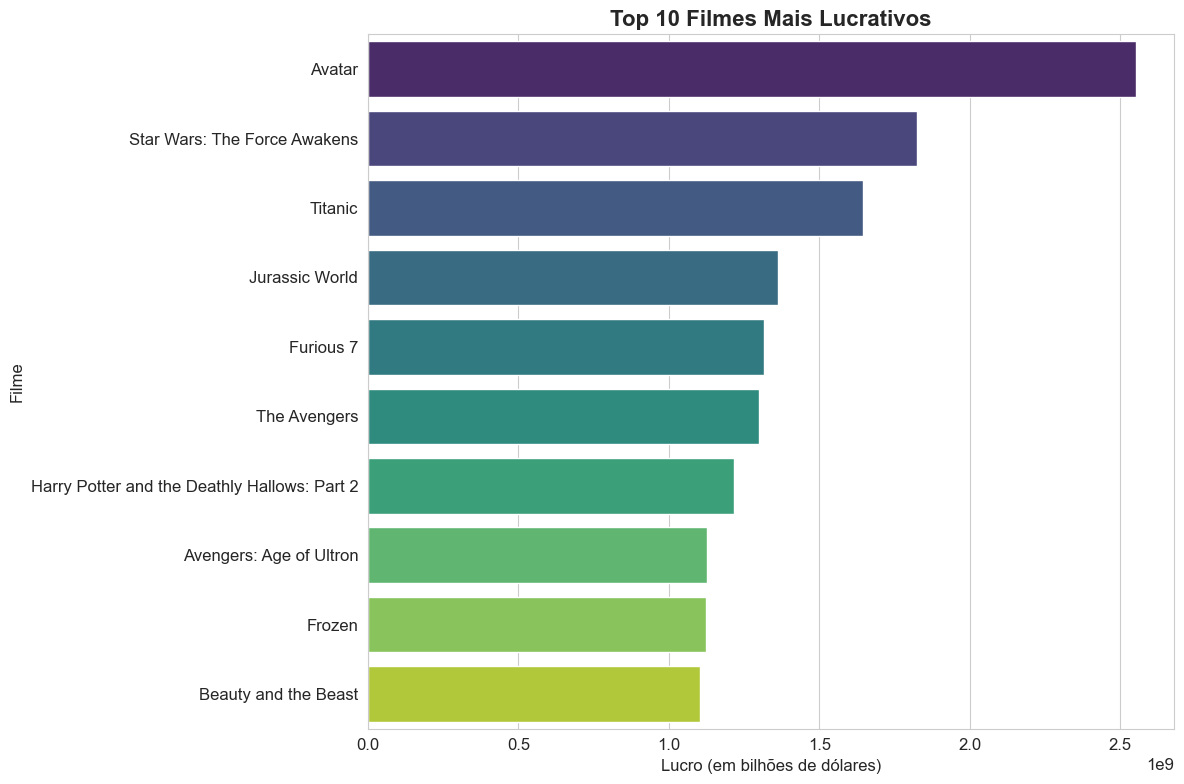

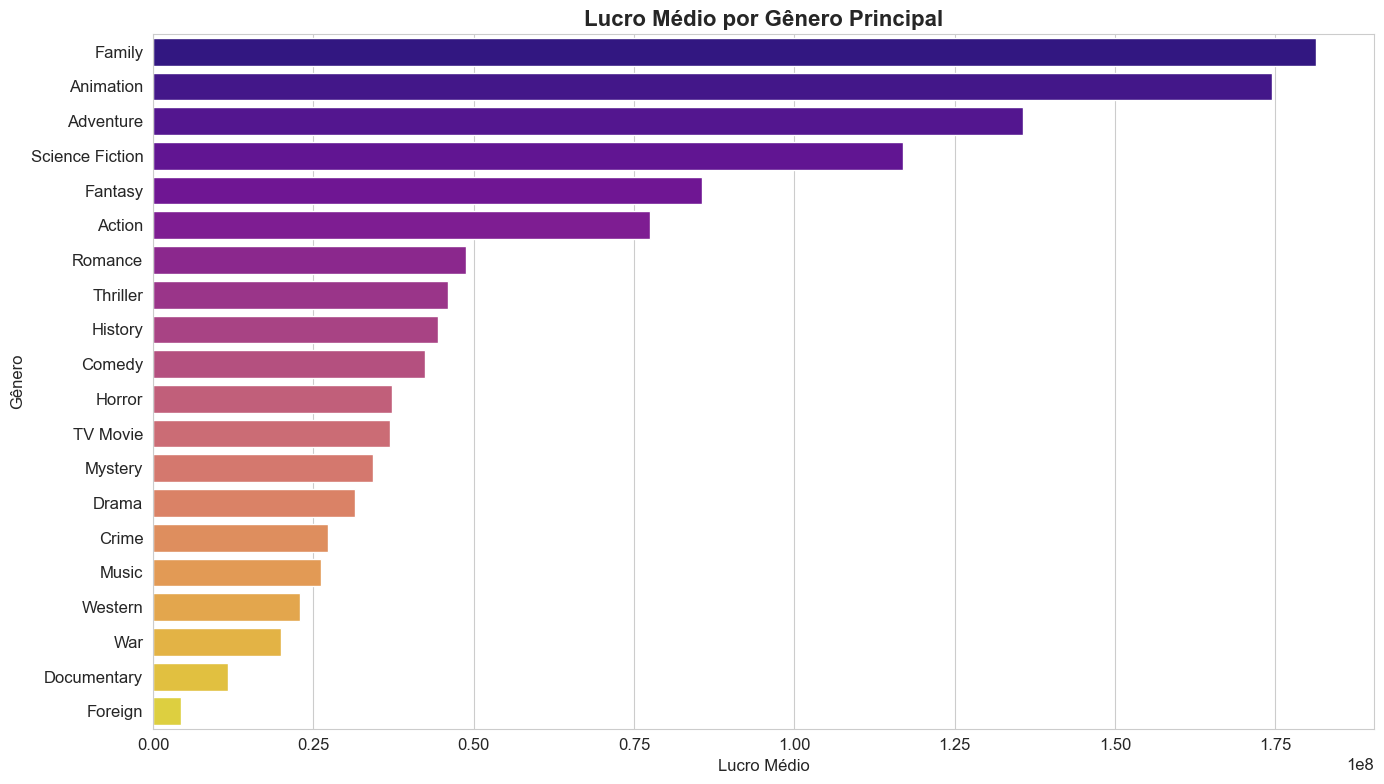

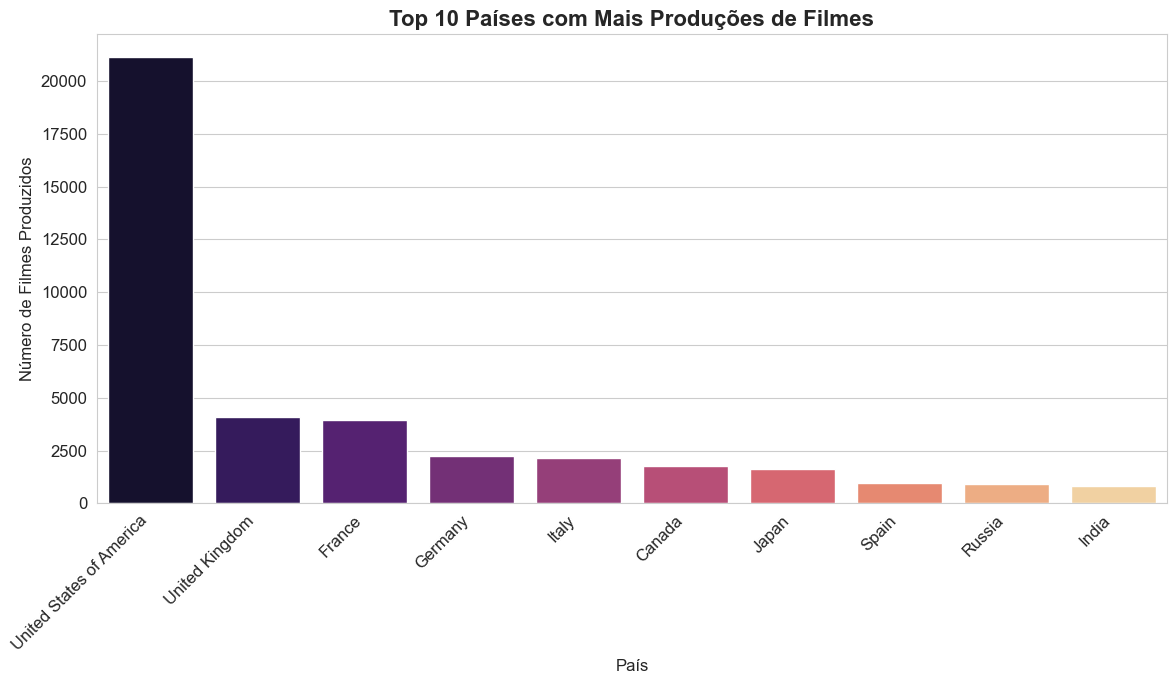

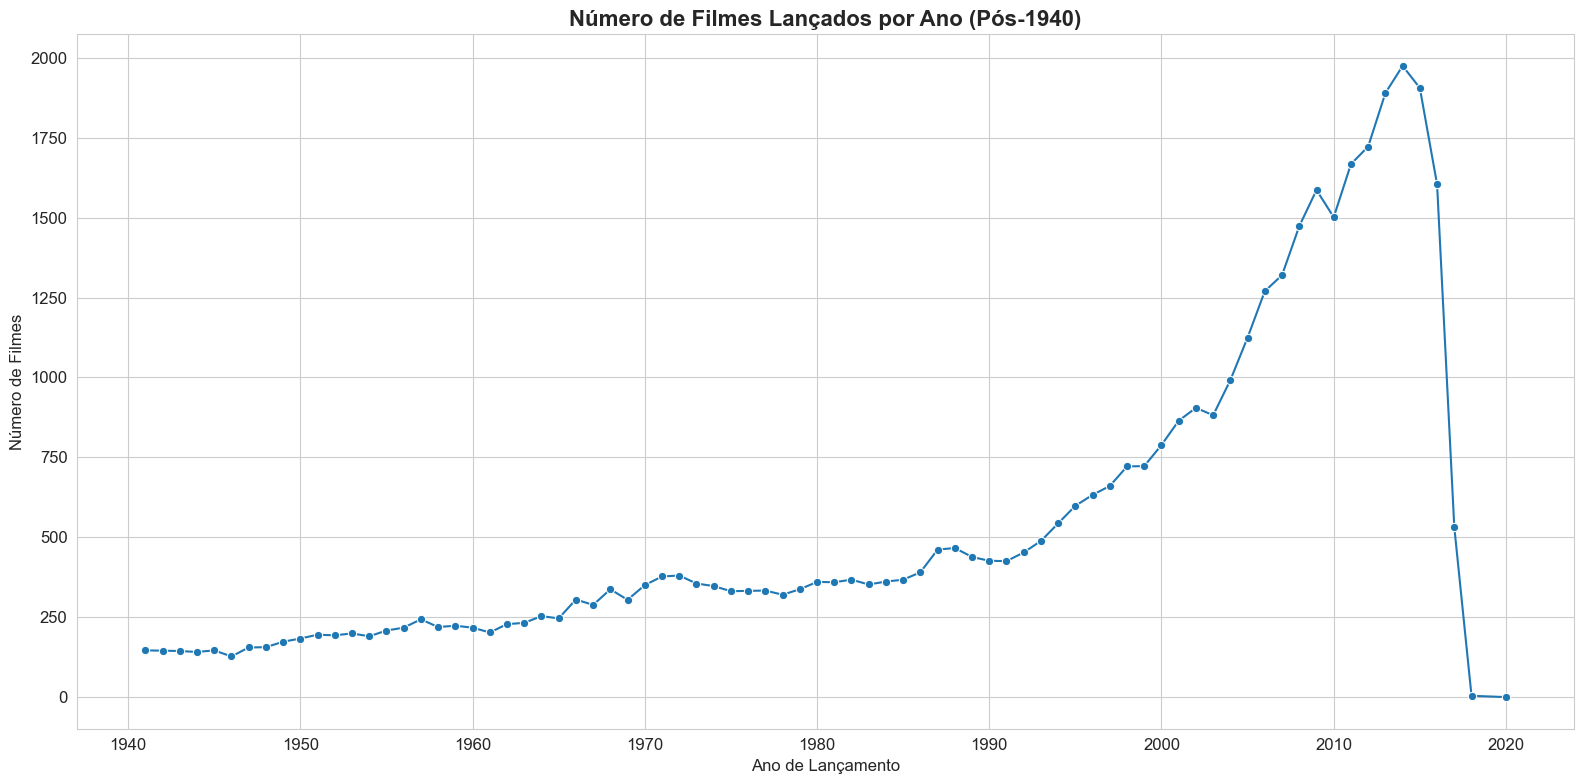

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# CERTIFIQUE-SE DE QUE SEU DATAFRAME 'df_final' FOI CRIADO NAS CÉLULAS ANTERIORES
# ==============================================================================

# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# --- Bloco de Análise (recriando as variáveis a partir do df_final) ---

# Análise de filmes mais lucrativos
df_analise = df_final[(df_final['budget'] > 0) & (df_final['revenue'] > 0)].copy()
df_analise['profit'] = df_analise['revenue'] - df_analise['budget']
filmes_mais_lucrativos = df_analise.sort_values(by='profit', ascending=False).head(10)

# Análise de lucro médio por gênero principal
lucro_por_genero = df_analise.groupby('genero_principal')['profit'].mean().sort_values(ascending=False)

# Análise de produção de filmes por país
colunas_paises = df_final.loc[:, 'Afghanistan':'Zimbabwe']
contagem_por_pais = colunas_paises.sum().sort_values(ascending=False).head(10)

# Análise de lançamentos de filmes ao longo dos anos
# Garante que a conversão de data seja feita (pode já ter sido feita antes, mas não há problema em repetir)
df_final['release_date'] = pd.to_datetime(df_final['release_date'], errors='coerce')
df_final['release_year'] = df_final['release_date'].dt.year
filmes_por_ano = df_final['release_year'].value_counts().sort_index()


# --- Gráfico 1: Top 10 Filmes Mais Lucrativos ---
plt.figure(figsize=(12, 8))
sns.barplot(data=filmes_mais_lucrativos, y='title', x='profit', hue='title', palette='viridis', legend=False)
plt.title('Top 10 Filmes Mais Lucrativos', fontsize=16, weight='bold')
plt.xlabel('Lucro (em bilhões de dólares)', fontsize=12) # Ajustei a escala no rótulo
plt.ylabel('Filme', fontsize=12)
plt.tight_layout()
plt.savefig('top_10_filmes_lucrativos.png')
plt.show()


# --- Gráfico 2: Lucro Médio por Gênero ---
plt.figure(figsize=(14, 8))
sns.barplot(y=lucro_por_genero.index, x=lucro_por_genero.values, hue=lucro_por_genero.index, palette='plasma', legend=False)
plt.title('Lucro Médio por Gênero Principal', fontsize=16, weight='bold')
plt.xlabel('Lucro Médio', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.tight_layout()
plt.savefig('lucro_medio_por_genero.png')
plt.show()


# --- Gráfico 3: Top 10 Países por Número de Produções ---
plt.figure(figsize=(12, 7))
sns.barplot(x=contagem_por_pais.index, y=contagem_por_pais.values, hue=contagem_por_pais.index, palette='magma', legend=False)
plt.title('Top 10 Países com Mais Produções de Filmes', fontsize=16, weight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Filmes Produzidos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_paises_producao.png')
plt.show()


# --- Gráfico 4: Número de Filmes Lançados por Ano ---
plt.figure(figsize=(16, 8))
# Filtra para remover anos muito antigos com poucos filmes que podem poluir o gráfico
filmes_por_ano_recente = filmes_por_ano[filmes_por_ano.index > 1940]
sns.lineplot(x=filmes_por_ano_recente.index, y=filmes_por_ano_recente.values, marker='o', linestyle='-')
plt.title('Número de Filmes Lançados por Ano (Pós-1940)', fontsize=16, weight='bold')
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Número de Filmes', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('filmes_por_ano.png')
plt.show()